## SIMPLE LINEAR REGRESSION (advertising.csv)

#### importing libraries and setting up the data frame

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/Advertising.csv')

# for col in df.columns: 
#     print(col)
del df['Unnamed: 0']
#print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [2]:
# #doing simple LR with y = sales, and x = TV
# data = {
#     "TV" : df["TV"],
#     "Sales" : df["Sales"]
# } 
# df = pd.DataFrame(data)
# #print(df)

#### splitting data set for training and testing (80/20)

In [3]:
n = len(df)

# train_df = df.loc[0:(n*0.8), :]
# test_df = df.loc[(n*0.8)+1:, :]
# print(train_df)
# print(test_df)

#### function for calculating B0 and B1 and RSS, RSE

In [4]:

def SLR(predictors, sales):
    
    RSS = {"TV": 0, "Radio": 0, "Newspaper": 0}
    RSE = {"TV": 0, "Radio": 0, "Newspaper": 0}
    R2 = {"TV": 0, "Radio": 0, "Newspaper": 0}

    B0 = {"TV": 0, "Radio": 0, "Newspaper": 0}
    B1 = {"TV": 0, "Radio": 0, "Newspaper": 0}

    for key, value in predictors.items():
        x = value.copy()
        y = sales.copy()

        mean_x = round(x.mean(), 4)
        mean_y = round(y.mean(), 4)

        deviation_x = round(x.sub(mean_x), 4)
        deviation_y = round(y.sub(mean_y), 4)

        deviation_xy = round(deviation_x.multiply(deviation_y), 4)
        sum_deviation_xy = sum(deviation_xy)

        deviation_x_sq = round(deviation_x.pow(2), 4)
        sum_deviation_x_sq = sum(deviation_x_sq)
        B1[key] = round(sum_deviation_xy/sum_deviation_x_sq, 4)
        B0[key] = round(mean_y - B1[key]*mean_x, 4)
        print("\n\nintercept (B0): {}".format(B0[key]), "\nslope (B1): {}".format(B1[key]))

        #multiplying series x with a scalar B1 has to be through the other attribute 
        est_y = round((x.multiply(other= B1[key])).add(B0[key]), 4)
        e = round(y.sub(est_y), 4)
        e_sq = round(e.pow(2), 4)
        RSS[key] = round(sum(e_sq), 4)
        RSE[key] = round((RSS[key]/(n-2))**0.5)
        
        TSS = round(sum(y.sub(mean_y)**2), 4)
        R2[key] = round(1 - (RSS[key]/TSS) , 2)

        print("RSS for {} : {}".format(key, RSS[key]))
        print("RSE for {} : {}".format(key, RSE[key]))
        print("R2 for {} : {}".format(key, R2[key]))
        
    return(RSS, RSE, R2, B0, B1)



#### plotting the model

In [5]:
def plotting_SLR(predictors, sales, B0, B1):
    for key, value in predictors.items():
        x = value.copy()
        y = sales.copy()
        print("\n\n{} v/s Sales".format(key))
        plt.scatter(x, y, color = 'blue')
        plt.xlabel('{}'.format(key), fontsize=14)
        plt.ylabel('sales', fontsize=14)
        #m is slope and b is intercept, 1 is for linear relationship
    #    m, b = np.polyfit(x, y, 1)
        plt.plot(x, B1[key]*x + B0[key], color='green')
        plt.show()

#### creating dictionary of series for model training 



intercept (B0): 7.038 
slope (B1): 0.0475
RSS for TV : 2102.5319
RSE for TV : 3
R2 for TV : 0.61


intercept (B0): 9.3115 
slope (B1): 0.2025
RSS for Radio : 3618.4879
RSE for Radio : 4
R2 for Radio : 0.33


intercept (B0): 12.3512 
slope (B1): 0.0547
RSS for Newspaper : 5134.8079
RSE for Newspaper : 5
R2 for Newspaper : 0.05


TV v/s Sales


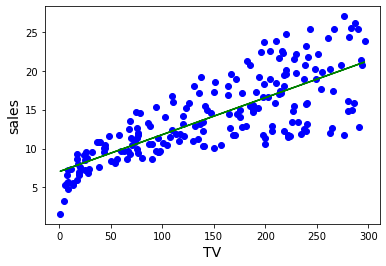



Radio v/s Sales


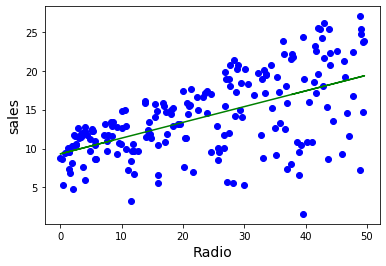



Newspaper v/s Sales


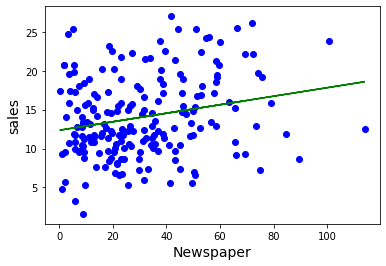

In [6]:
predictors = {"TV" : df["TV"], "Radio": df["Radio"], "Newspaper": df["Newspaper"]}


RSS, RSE, R2, B0, B1 = SLR(predictors, df["Sales"])
plotting_SLR(predictors, df["Sales"], B0, B1)